In [1]:
#################
#### IMPORTS ####
#################

# Arrays
import numpy as np
import cytoolz

# Deep Learning stuff
import torch
import torchvision
import torchvision.transforms as transforms

# Images display and plots
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
import matplotlib.pylab as pl

# Fancy progress bars
import tqdm.notebook as tq

# Tensor Network Stuff
%config InlineBackend.figure_formats = ['svg']
import quimb.tensor as qtn # Tensor Network library
import quimb

import collections
import opt_einsum as oe
import itertools
import copy

In [2]:
import sys, os
sys.path.insert(0, '../')
# My functions
from TNutils import *


In [3]:
train_set, test_set = get_data()


### 1. MPS with Iterative Pruning

In [4]:
mps = initialize_mps()

In [5]:
imgs = train_set[:100]

_imgs = []
for img in imgs:
    _imgs.append( tens_picture(img) )
_imgs = np.array(_imgs)
img_cache = left_right_cache(mps, _imgs)


In [6]:
print(mps.max_bond)

<bound method TensorNetwork.max_bond of <MatrixProductState(tensors=784, indices=1567, L=784, max_bond=30)>>


In [7]:
for lr,comp in zip([0.1,0.08,0.05,0.03,0.02,0.01,0.01],[60,60,60,120,120,120,240]):
    learning_epoch_cached(mps, _imgs, 1, lr, img_cache, batch_size = 100, max_bond = 512, cutoff = 1e-8)
    print(mps.max_bond)
    compress(mps, comp)
    img_cache = left_right_cache(mps, _imgs)

NLL: 564.2229016907966 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 74.05979607670567 | Baseline: 4.605170185988092
<bound method TensorNetwork.max_bond of <MatrixProductState(tensors=784, indices=1567, L=784, max_bond=120)>>
NLL: 89.21595689511521 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 42.60064659546979 | Baseline: 4.605170185988092
<bound method TensorNetwork.max_bond of <MatrixProductState(tensors=784, indices=1567, L=784, max_bond=160)>>
NLL: 100.10485805519218 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 35.43144861937938 | Baseline: 4.605170185988092
<bound method TensorNetwork.max_bond of <MatrixProductState(tensors=784, indices=1567, L=784, max_bond=159)>>
NLL: 113.52767407091278 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 37.325615167217265 | Baseline: 4.605170185988092
<bound method TensorNetwork.max_bond of <MatrixProductState(tensors=784, indices=1567, L=784, max_bond=158)>>
NLL: 47.46628174983981 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 29.377305068702935 | Baseline: 4.605170185988092
<bound method TensorNetwork.max_bond of <MatrixProductState(tensors=784, indices=1567, L=784, max_bond=210)>>
NLL: 66.04797216173968 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 50.41187493210439 | Baseline: 4.605170185988092
<bound method TensorNetwork.max_bond of <MatrixProductState(tensors=784, indices=1567, L=784, max_bond=212)>>
NLL: 68.64745731219057 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 34.60573079512112 | Baseline: 4.605170185988092
<bound method TensorNetwork.max_bond of <MatrixProductState(tensors=784, indices=1567, L=784, max_bond=212)>>


In [8]:
computeNLL(mps, imgs)

34.597858427979475

### 2. MPS without Iterative Pruning

In [9]:
mps2 = initialize_mps()

In [10]:
img_cache2 = left_right_cache(mps2, _imgs)


In [11]:
for lr in [0.1,0.08,0.05,0.03,0.02,0.01,0.01]:
    learning_epoch_cached(mps2, _imgs, 1, lr, img_cache2, batch_size = 100, max_bond = 512, cutoff = 1e-8)

NLL: 579.4108994307501 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 78.31726082812561 | Baseline: 4.605170185988092
NLL: 78.31726082812561 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 63.63469324019718 | Baseline: 4.605170185988092
NLL: 63.63469324019718 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 50.69310438384541 | Baseline: 4.605170185988092
NLL: 50.69310438384541 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 52.758997270938934 | Baseline: 4.605170185988092
NLL: 52.758997270938934 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 33.70618626501687 | Baseline: 4.605170185988092
NLL: 33.70618626501687 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 32.87538010394733 | Baseline: 4.605170185988092
NLL: 32.87538010394733 | Baseline: 4.605170185988092
epoch 1/1


  0%|          | 0/1564 [00:00<?, ?it/s]

NLL: 31.155706047809947 | Baseline: 4.605170185988092


In [12]:
computeNLL(mps2, imgs)

31.42068479452304

### 3. MPS3 compression of MPS2 after training

In [13]:
mps3 = compress_copy(mps2,240)

In [14]:
computeNLL(mps3, imgs)

69.65873361164222

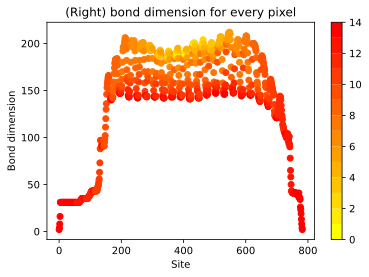

In [15]:
plot_dbonds(mps)

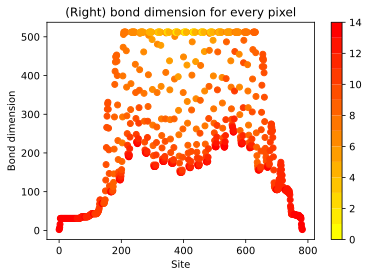

In [16]:
plot_dbonds(mps2)

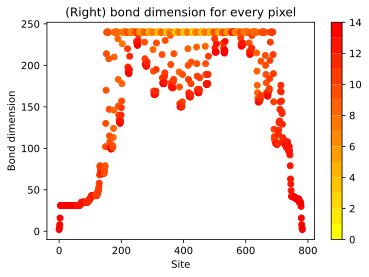

In [17]:
plot_dbonds(mps3)

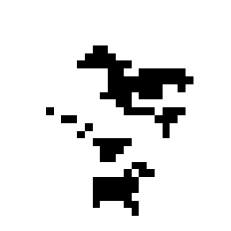

In [25]:
plot_img(generate_sample(mps))

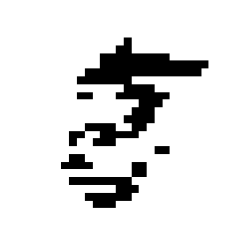

In [26]:
plot_img(generate_sample(mps2))

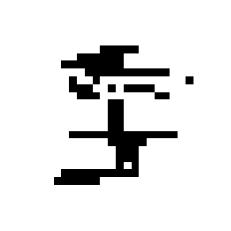

In [27]:
plot_img(generate_sample(mps3))

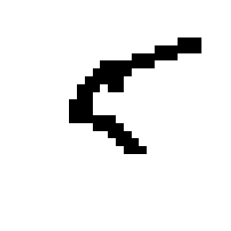

In [35]:
corr_img = partial_removal_img(test_set[3], fraction = .3, axis = 0)
plot_img(corr_img)

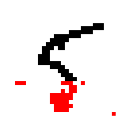

In [36]:
plot_rec(corr_img, reconstruct(mps, corr_img))

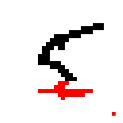

In [37]:
plot_rec(corr_img, reconstruct(mps2, corr_img))

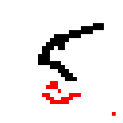

In [38]:
plot_rec(corr_img, reconstruct(mps3, corr_img))

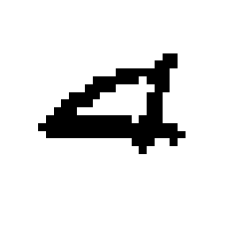

In [48]:
corr_img2 = partial_removal_img(train_set[51], fraction = .3, axis = 0)
plot_img(corr_img2)

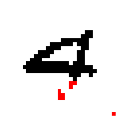

In [49]:
plot_rec(corr_img2, reconstruct(mps, corr_img2))

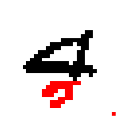

In [50]:
plot_rec(corr_img2, reconstruct(mps2, corr_img2))

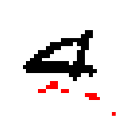

In [51]:
plot_rec(corr_img2, reconstruct(mps3, corr_img2))

In [43]:
#save_mps_sets(mps, train_set[:100], './pruning_test/iterative_pruning', test_set[:10])
#save_mps_sets(mps2, train_set[:100], './pruning_test/nO_pruning', test_set[:10])
#save_mps_sets(mps3, train_set[:100], './pruning_test/compression_after_training', test_set[:10])

#########
# LOAD
#########
#mps, train_set, test_set = load_mps_sets('./pruning_test/iterative_pruning')
#mps2, train_set, test_set = load_mps_sets('./pruning_test/nO_pruning')
#mps3, train_set, test_set = load_mps_sets('./pruning_test/compression_after_training')